# Swift Coding Club 
## 1st Year Task

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [231]:
train = pd.read_csv("student_extended_ml_dataset2.csv",index_col=False)
sns.set(rc={'axes.facecolor':'#33FFA2', 'figure.facecolor':'lightgrey'})

In [232]:
train

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


<Axes: >

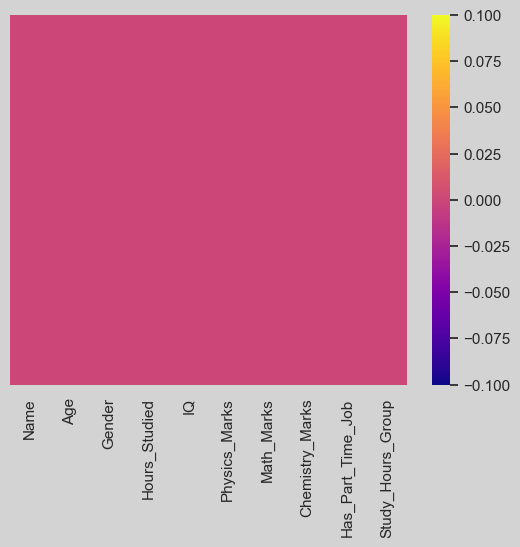

In [234]:
sns.heatmap(train.isnull(),yticklabels=False, xticklabels=True, cbar=True, cmap="plasma") #NO-null values

- From above we can see there are no null values, so now we dont have to spent time in data cleaning.
- We get to know the data type of following Columns.

In [235]:
train.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


<Axes: xlabel='Age', ylabel='count'>

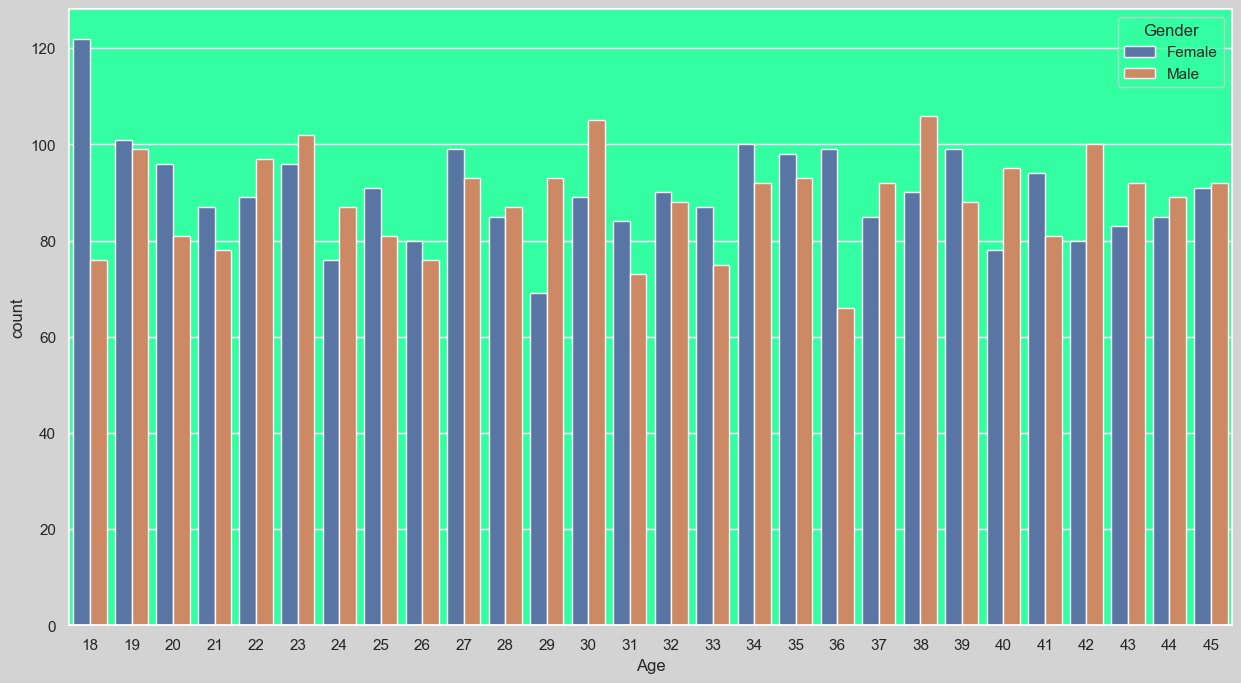

In [236]:
plt.figure(figsize=(15,8))
sns.countplot(data=train, x='Age', hue= 'Gender')

<Axes: xlabel='Age', ylabel='count'>

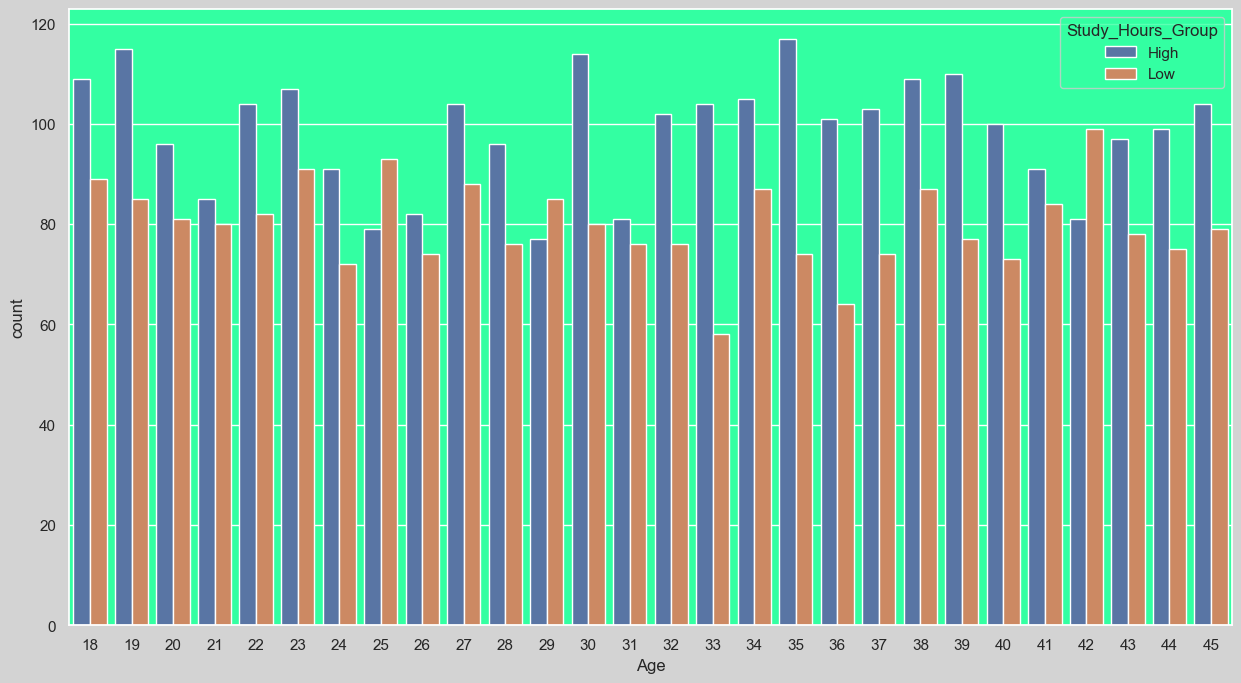

In [237]:
plt.figure(figsize=(15,8))
sns.countplot(train, x = "Age", hue="Study_Hours_Group")

<Axes: xlabel='Age', ylabel='count'>

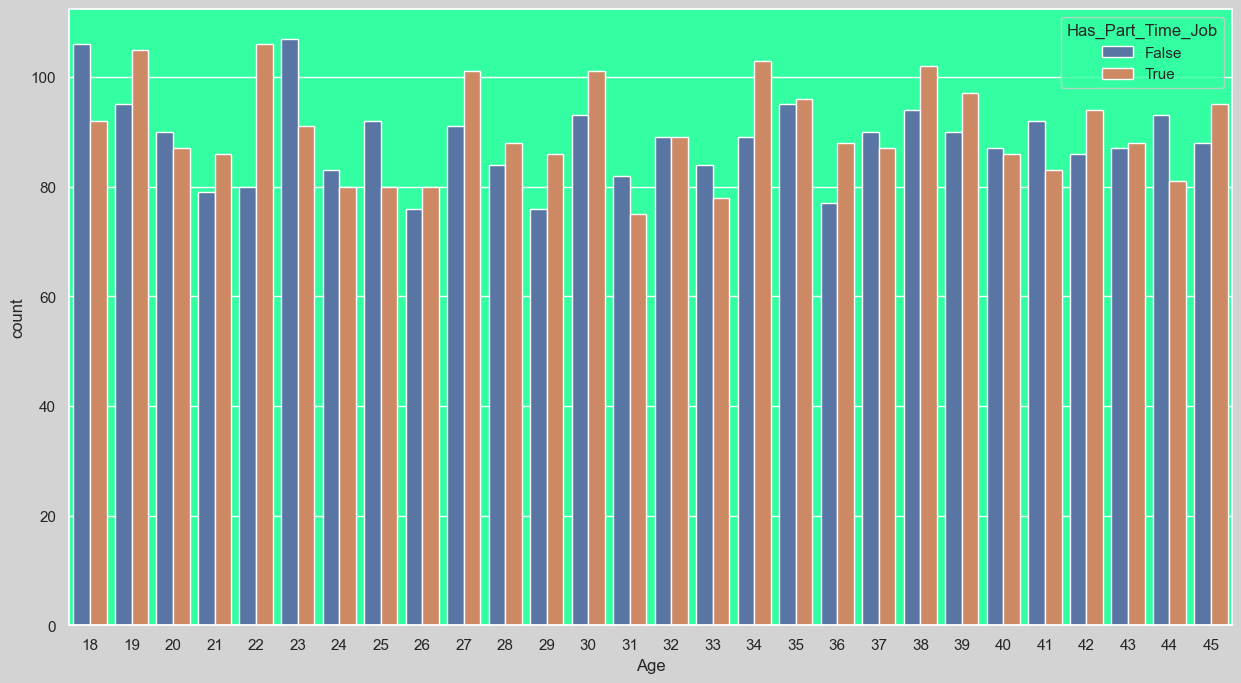

In [238]:
plt.figure(figsize=(15,8))
sns.countplot(train, x = "Age", hue="Has_Part_Time_Job")

<Axes: xlabel='Gender', ylabel='count'>

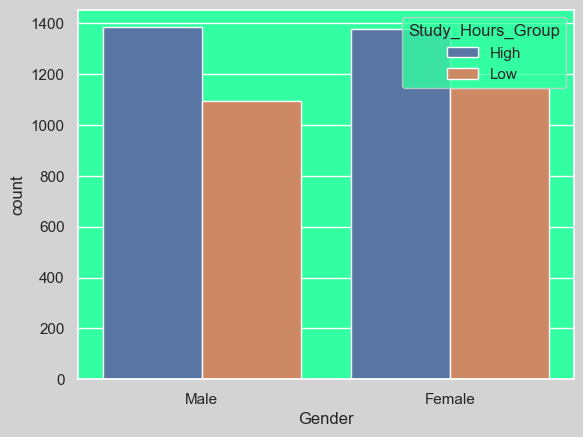

In [239]:
sns.countplot(train, x="Gender", hue="Study_Hours_Group")

<Axes: xlabel='Gender', ylabel='count'>

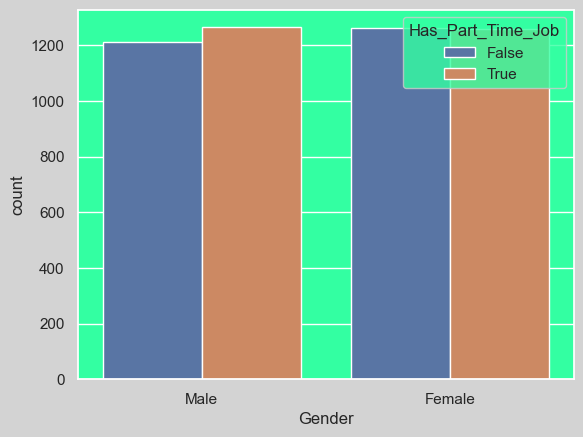

In [240]:
sns.countplot(train, x="Gender", hue="Has_Part_Time_Job")

In [241]:
train[train['Gender'] == 'Female']['Has_Part_Time_Job'].value_counts()

Has_Part_Time_Job
False    1263
True     1260
Name: count, dtype: int64

In [242]:
train[train['Gender'] == 'Male']['Has_Part_Time_Job'].value_counts()

Has_Part_Time_Job
True     1265
False    1212
Name: count, dtype: int64

In [243]:
print("Avg. PHY Marks: {}".format(np.mean(train['Physics_Marks'])))
print("Avg. CHEM Marks: {}".format(np.mean(train['Chemistry_Marks'])))
print("Avg. Maths Marks: {}".format(np.mean(train['Math_Marks'])))

Avg. PHY Marks: 70.311
Avg. CHEM Marks: 69.7988
Avg. Maths Marks: 69.816


<Axes: xlabel='Age', ylabel='Physics_Marks'>

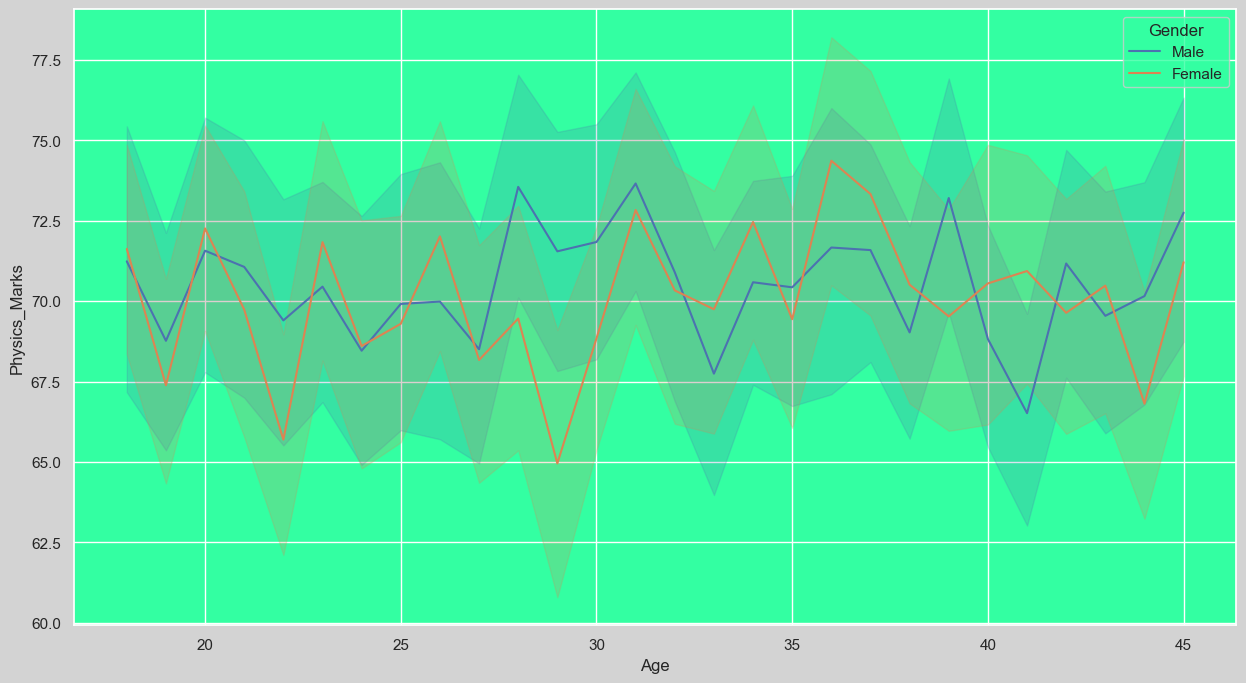

In [244]:
plt.figure(figsize=(15,8))

sns.lineplot(x="Age", y="Physics_Marks", hue="Gender",data=train)

<Axes: xlabel='Age', ylabel='Chemistry_Marks'>

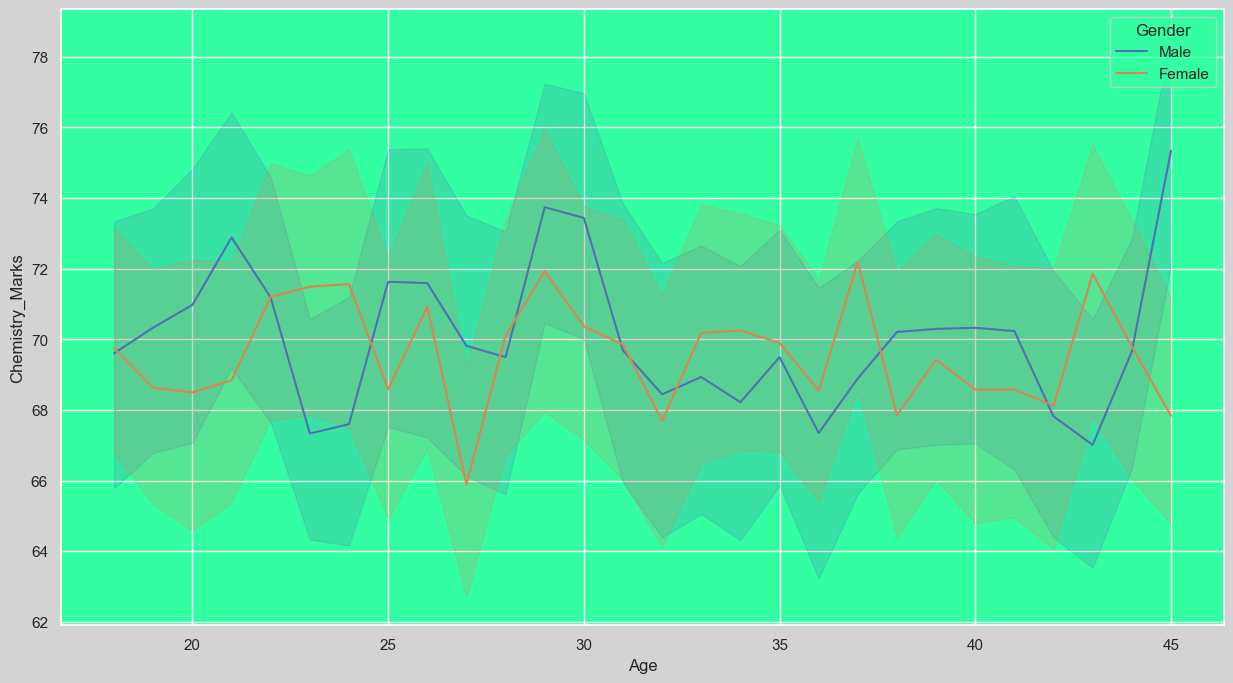

In [245]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Age", y="Chemistry_Marks", hue="Gender",data=train)

<Axes: xlabel='Age', ylabel='Math_Marks'>

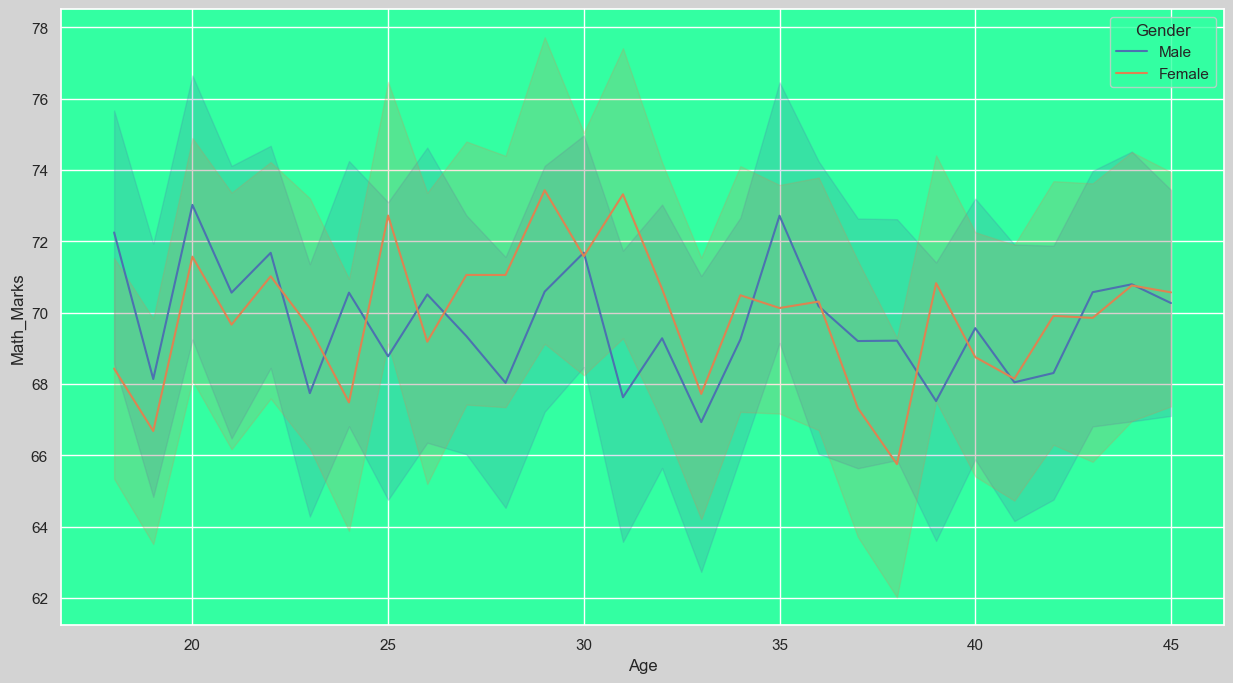

In [246]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Age", y="Math_Marks", hue="Gender",data=train, weights=50)

In [247]:
train['Study_Hours_Group'].value_counts()

Study_Hours_Group
High    2763
Low     2237
Name: count, dtype: int64

In [248]:
train["Has_Part_Time_Job"].value_counts()

Has_Part_Time_Job
True     2525
False    2475
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='IQ'>

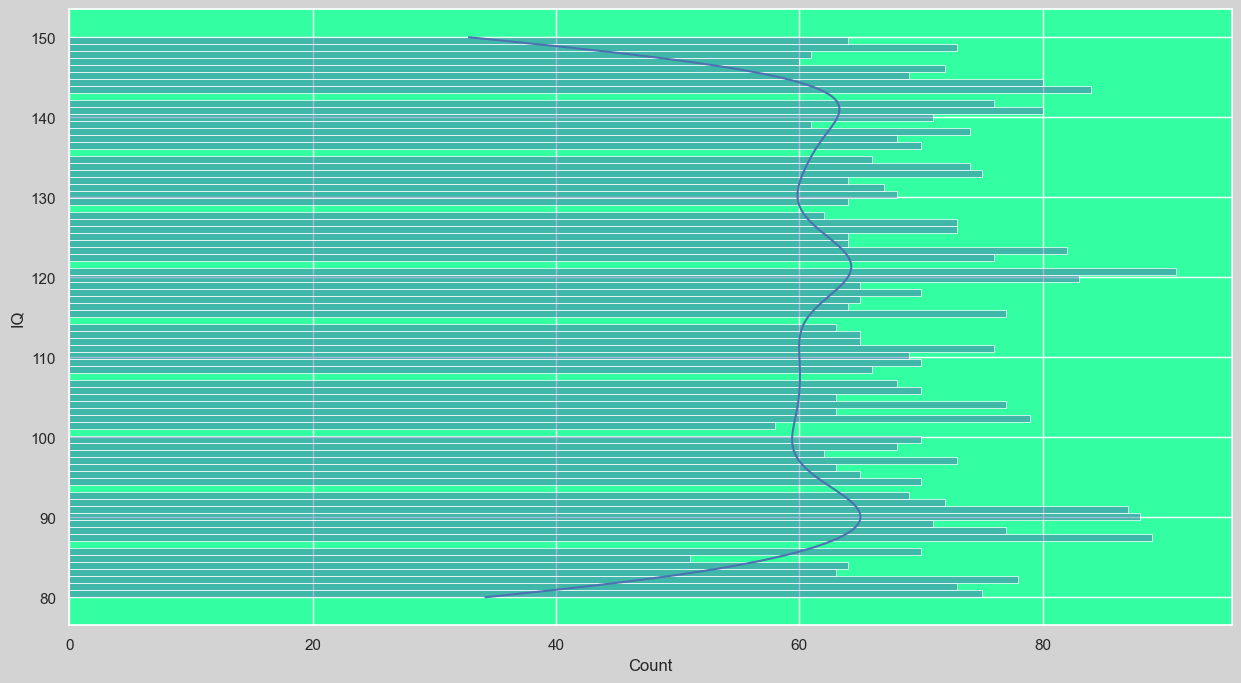

In [249]:
plt.figure(figsize=(15,8))
sns.histplot(y="IQ", data=train, bins=80, kde=True)

<Axes: xlabel='Study_Hours_Group', ylabel='IQ'>

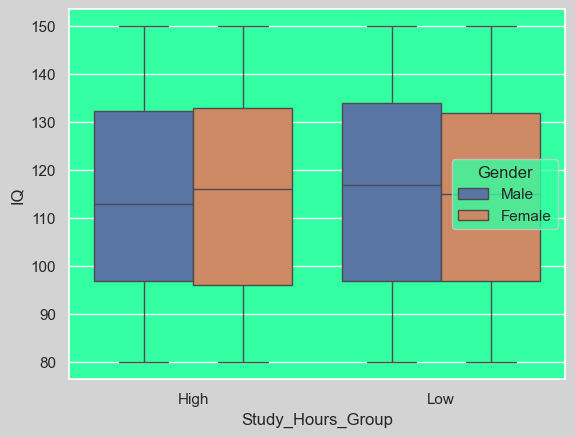

In [250]:
sns.boxplot(x="Study_Hours_Group", y="IQ",hue='Gender', data=train)

<Axes: xlabel='Has_Part_Time_Job', ylabel='IQ'>

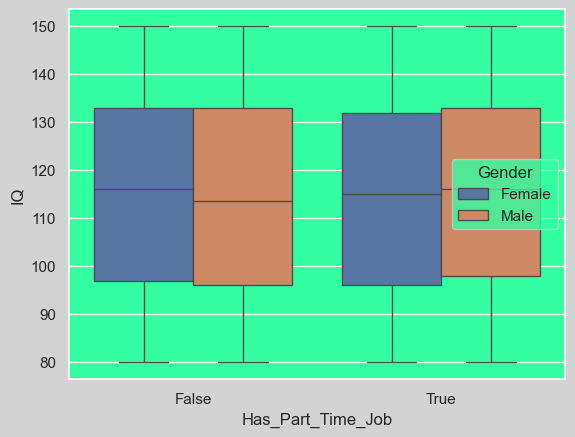

In [251]:
sns.boxplot(x="Has_Part_Time_Job", y="IQ",hue='Gender', data=train)

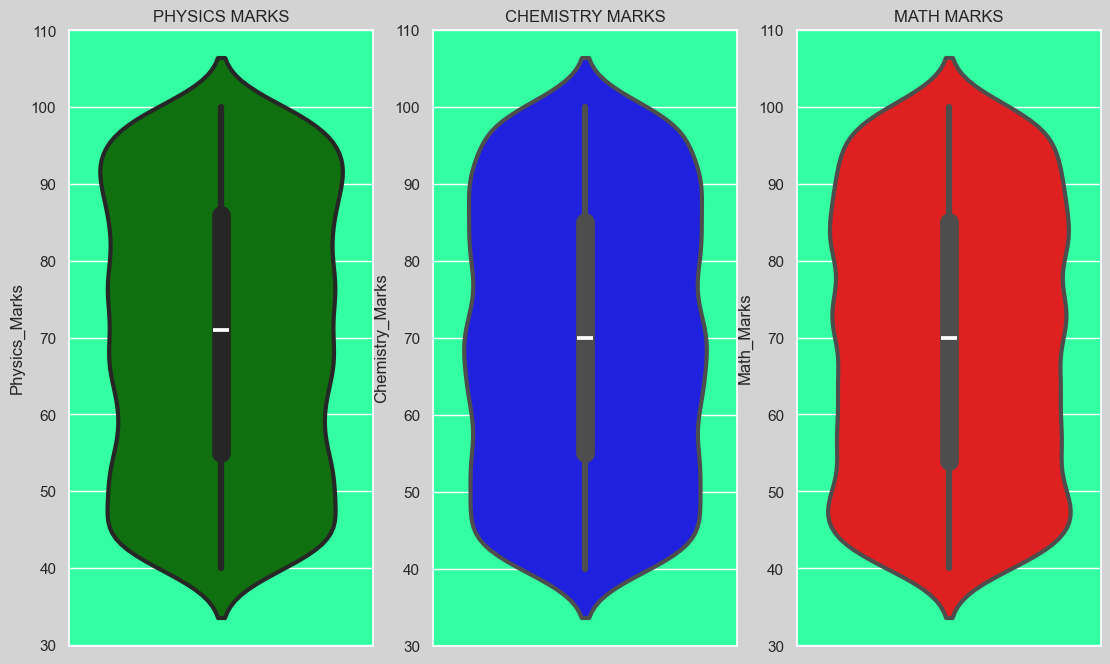

In [252]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('PHYSICS MARKS')
sns.violinplot(y='Physics_Marks',data=train,color='green',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('CHEMISTRY MARKS')
sns.violinplot(y='Chemistry_Marks',data=train,color='blue',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('MATH MARKS')
sns.violinplot(y='Math_Marks',data=train,color='red',linewidth=3)

plt.show()

<Axes: xlabel='Age', ylabel='IQ'>

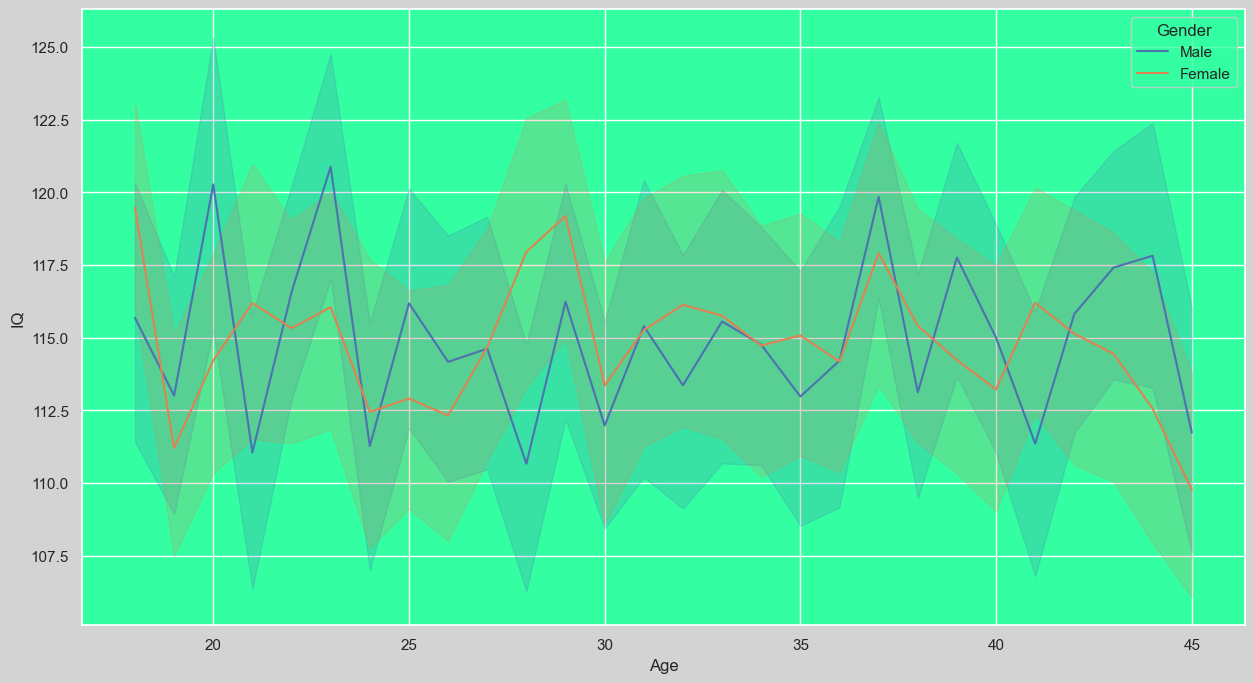

In [253]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Age", y="IQ", hue="Gender",data=train)

<Axes: xlabel='IQ', ylabel='Count'>

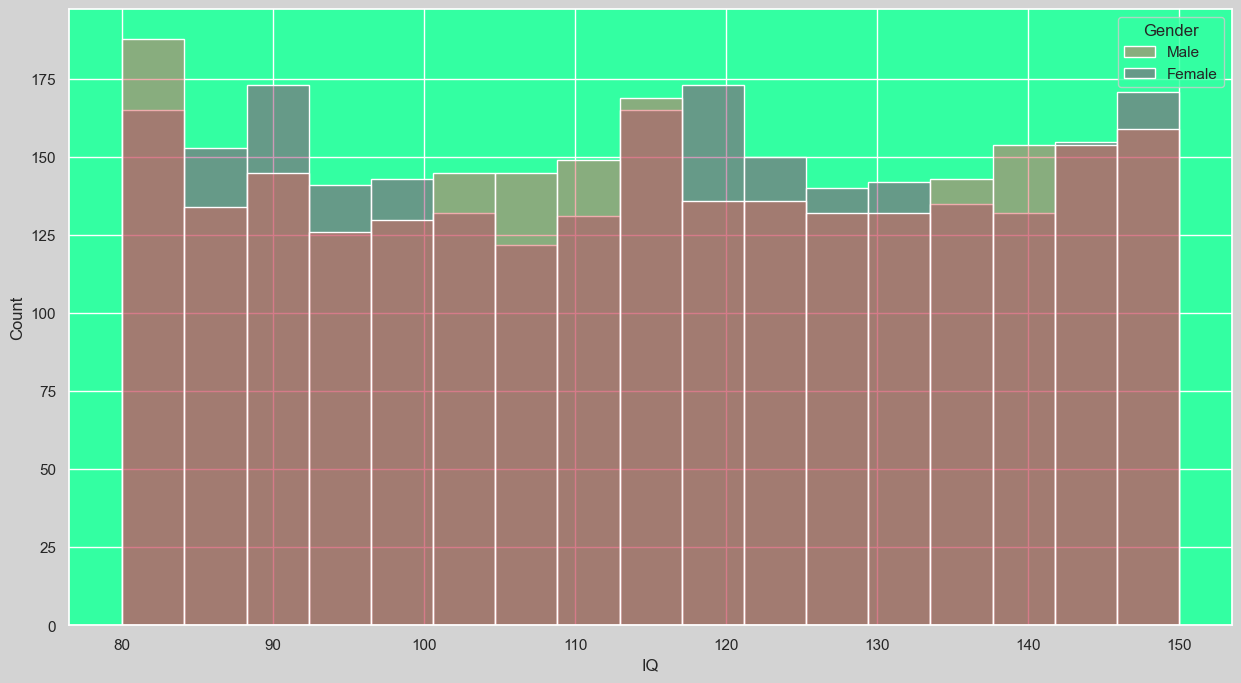

In [254]:
plt.figure(figsize=(15,8))
sns.histplot( x="IQ", hue="Gender", palette='flare' ,data=train)

<Axes: ylabel='Physics_Marks'>

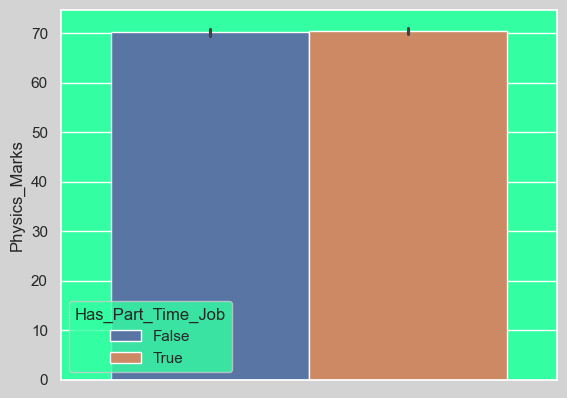

In [255]:
sns.barplot(y="Physics_Marks", hue="Has_Part_Time_Job", data= train)

<Axes: ylabel='Chemistry_Marks'>

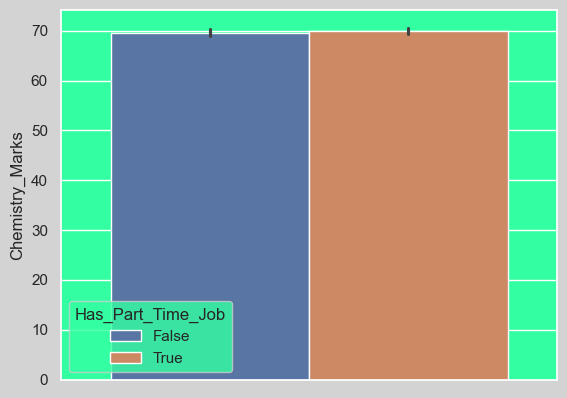

In [256]:
sns.barplot(y="Chemistry_Marks", hue="Has_Part_Time_Job", data= train)

<Axes: ylabel='Math_Marks'>

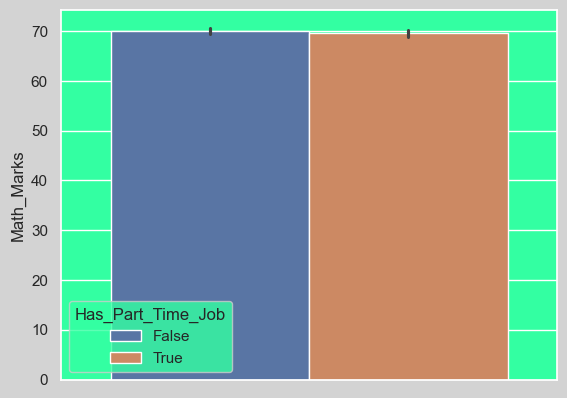

In [257]:
sns.barplot(y="Math_Marks", hue="Has_Part_Time_Job", data= train)

# Model


In [258]:
Sex=pd.get_dummies(train['Gender'], drop_first=True, dtype=int)

In [259]:
Part_Time_Job=pd.get_dummies(train['Has_Part_Time_Job'], drop_first=True, dtype=int)
Part_Time_Job

,True
0,1
1,0
2,1
3,0
4,1
...,...
4995,1
4996,1
4997,0
4998,0


In [260]:
Study_hr= pd.get_dummies(train['Study_Hours_Group'], drop_first=True, dtype=int)

In [261]:
Study_hr 

,Low
0,0
1,0
2,0
3,1
4,1
...,...
4995,1
4996,1
4997,1
4998,0


## In the above block, 0 represent High & 1 represent Low

In [262]:
train2=pd.concat([train, Sex, Part_Time_Job,Study_hr], axis=1)

In [263]:
#Drop the categorical Functions
train.drop(columns=['Name','Gender','Has_Part_Time_Job','Study_Hours_Group'], inplace=True)

In [264]:
train

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
0,19,8.140821,92,87,43,85
1,35,9.825626,112,86,81,54
2,33,8.835372,131,87,52,57
3,33,2.482483,138,70,86,83
4,28,4.419793,90,95,48,83
...,...,...,...,...,...,...
4995,30,3.653474,143,93,59,85
4996,33,1.096493,132,68,70,99
4997,38,4.156770,111,76,96,71
4998,18,6.788548,137,81,98,73


In [270]:
train2=train.copy()
train2.drop(columns=['IQ'],inplace=True) #Droping categorical function
train2

,Age,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks
0,19,8.140821,87,43,85
1,35,9.825626,86,81,54
2,33,8.835372,87,52,57
3,33,2.482483,70,86,83
4,28,4.419793,95,48,83
...,...,...,...,...,...
4995,30,3.653474,93,59,85
4996,33,1.096493,68,70,99
4997,38,4.156770,76,96,71
4998,18,6.788548,81,98,73


In [265]:
X=train2

In [266]:
y=train['IQ']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [274]:
pred=reg.predict(X_test)

In [275]:
pred

array([ 88., 144.,  80.,  84., 129., 100.,  87.,  80.,  99., 110., 105.,
       136., 108., 138.,  98., 118., 121., 110., 113., 149., 118., 138.,
       108., 106., 136.,  97., 147.,  90., 121.,  93., 103., 128.,  80.,
       121., 124., 134., 121., 126., 112.,  87.,  91.,  93., 118., 130.,
       141.,  82., 111., 104.,  87., 148., 110.,  84.,  96.,  89., 115.,
       102., 141., 124., 138., 117., 127., 104.,  90., 114., 103.,  97.,
        87., 105., 127., 106.,  89.,  81.,  92., 107.,  91., 139., 120.,
        84., 132.,  98., 114., 116., 106.,  84., 149.,  91.,  87., 121.,
        92., 111.,  87., 123., 108., 120., 114.,  82., 145.,  82.,  85.,
        97., 144., 126.,  97.,  90.,  80., 144.,  86., 104.,  94., 139.,
       113.,  98., 122., 140.,  87., 104., 128.,  81.,  86., 134., 115.,
       118., 135.,  82., 145., 108., 127., 125., 124., 117., 108., 107.,
       121., 140., 111., 115., 111., 106.,  95., 115., 129., 146., 101.,
        86.,  84., 122.,  92., 112.,  90., 150., 14